# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [208]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [209]:
df.info() # Analisando a base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


Percebemos algumas colunas que não estão no formato desejado, e que o DataFrame tem 164 linhas (uma base de dados pequena)

### Vamos começar pelo campo Age

In [210]:
df['Age'].unique() # Verificando como estão dispostos os dados

array([25., 30., 35., 40., 45., 50., 26., 31., nan, 43., 48., 53., 29.,
       34., 39., 44., 49., 36., 41., 46., 51., 27., 32., 37., 42., 47.,
       52., 28., 33., 38.])

Temos que os numeros são inteiros, com alguns dados nulos. Vamos ver quantos?

In [211]:
(df.isnull().sum() / len(df)) * 100 # Soma todas as colunas nulas do DataFrame e divide pelo tamanho do DataFrame

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

Mais de 20% dos dados da coluna Age são nulas. Vamos ver a média e mediana de Age?

In [212]:
print('A média de idade é: ', df['Age'].mean())
print('A mediana de idade é: ', df['Age'].median())
print('Temos {} idades unicas'.format(df['Age'].nunique()))

A média de idade é:  37.50769230769231
A mediana de idade é:  36.0
Temos 29 idades unicas


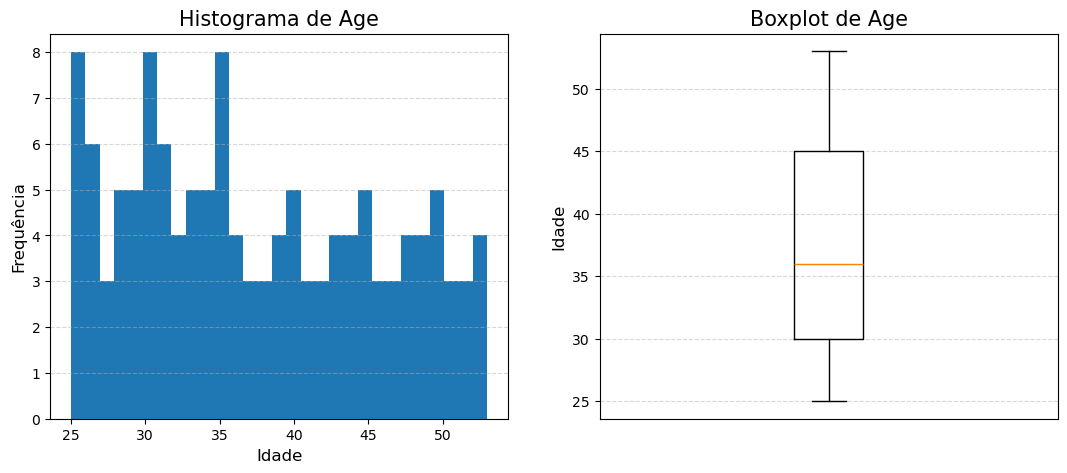

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5)) # Configuramos dois gráficos em uma linha

axes[0].hist(df['Age'], bins=29) # Optei por usar tantas barras quanto o número de idades únicas (df['Age'].nunique())
axes[0].set_title('Histograma de Age', fontsize=15) # Configuramos o título
axes[0].set_ylabel('Frequência', fontsize=12) # Título do eixo Y
axes[0].set_xlabel('Idade', fontsize=12) # Título do eixo X
axes[0].grid(axis='y', linestyle='--', alpha=0.5) # Configuramos um grid com linhas horizontais para visualizar melhor o gráfico

axes[1].boxplot(df['Age'].dropna()) # Usamos o dropna() aqui pois o matplotlib não consegue plotar BoxPlot com dados nulos. Será tratado depois.
axes[1].set_title('Boxplot de Age', fontsize=15) # Configuramos o título
axes[1].set_ylabel('Idade', fontsize=12) # Título do eixo Y
axes[1].grid(axis='y', linestyle='--', alpha=0.5) # Configuramos um grid com linhas horizontais para visualizar melhor o gráfico
axes[1].set_xticks([])

plt.show()

Visualmente nos gráfico, vemos que os dados estão bem distribuídos. Tanto pelo histograma quanto pelo *BoxPlot* podemos notar que os clientes **tendem a ter uma idade não tão velha**. Como a media(37.5 anos) é muito próxima da mediana (36 anos), podemos usar a mediana para substituir valores nulos. **Optaremos pela mediana** por ser **menos sensível a outliers** e também porque **os dados estão mais distribuídos para idades menores a 37.5 anos.**

In [214]:
age_median = df['Age'].median() # Configuramos uma variável que armazena o valor da mediana

df = df.fillna({'Age': age_median}) # Preenchemos os dados nulos com o valor da mediana

df.isnull().sum() # Testando se sobrou dados nulos

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [215]:
df['Age'] = df['Age'].astype(int) # Configuramos o campo Age para ser inteiro
# df.info() # Verificamos se a conversão deu certo

### Vamos verificar agora o campo Gender

In [216]:
df['Gender'].unique() # Sem erros de digitação. Já vimos anteriormente que não há dados nulos
df['Gender'] = df['Gender'].str.upper() # Usamos caixa alta para variáveis categóricas
# df.info()

### Vamos verificar o campo Income

In [217]:
df['Income'].unique() # Vamos ver como estão dispostos os dados
df['Income'] = df['Income'].str.replace('.', '', regex=False) # Altera '.' para vazio
df['Income'] = df['Income'].str.replace(',', '.', regex=False) # Altera ',' para '.'
df['Income'] = df['Income'].astype(float) # Converte a coluna para o tipo float
# df.info() # Mostra os dtypes dos campos

### Analisando o campo Education

In [218]:
df['Education'].unique() # Sem erros ou dados duplicados
df['Education'].isnull().sum() # Sem valores nulos
df['Education'] = df['Education'].str.upper() # Convertemos para maiúsculo
# df.info()

### Analisando o campo Marital Status

In [219]:
df['Marital Status'].unique() # Sem erros de nomenclatura
df['Marital Status'].isnull().sum() # Sem campos nulos
df['Marital Status'] = df['Marital Status'].str.upper()
# df.info()

### Analisando Number of Children

In [220]:
df['Number of Children'].unique() # Sem dados errôneos
df['Number of Children'].isnull().sum() # Sem dados nulos
df['Number of Children'].dtype # Já é um campo int
# df.info()

dtype('int64')

### Analisando Home Ownership

In [221]:
df['Home Ownership'].unique() # Sem dados errôneos
df['Home Ownership'] = df['Home Ownership'].str.upper() # Convertendo para maiúsculas
# df.info()

### Analisando Credit Score

In [222]:
df['Credit Score'].unique() # Sem erros de digitação
df['Credit Score'] = df['Credit Score'].str.upper() # Convertemos para maiúscula
# df.info()

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [223]:
df.describe() # Analisamos os dados numéricos

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


### Vamos plotar um boxplot para todos eles e analisar possíveis outliers?

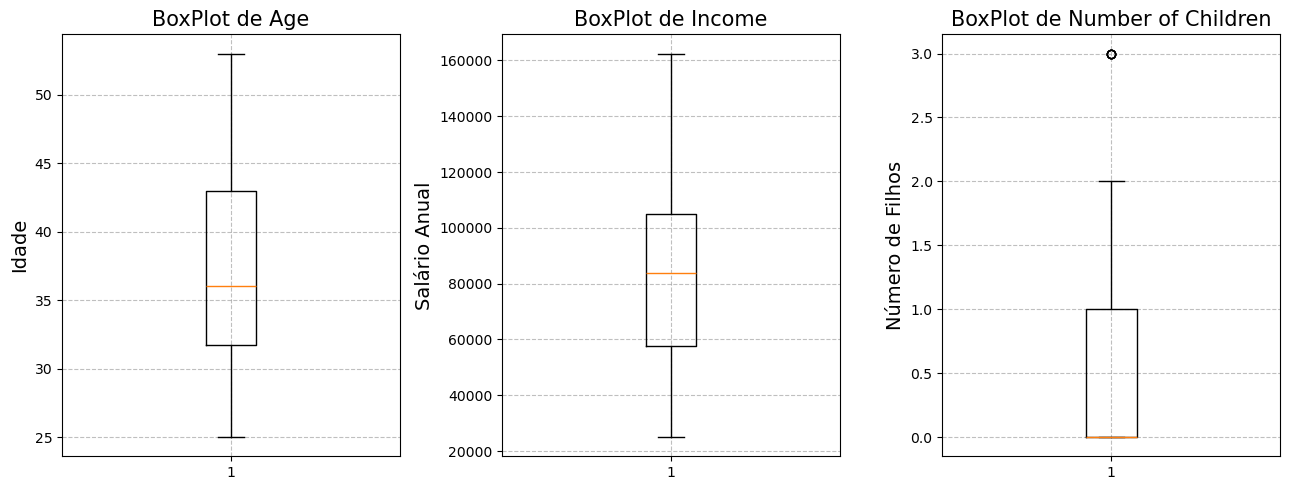

In [224]:
fig, axes = plt.subplots(1, 3, figsize=(13,5)) # Configura 3 gráficos em uma linha

axes[0].set_title('BoxPlot de Age', fontsize=15) # Título do gráfico
axes[0].boxplot(df['Age']) # Instancia o gráfico para Age
axes[0].set_ylabel('Idade', fontsize=14) # Título do eixo Y
axes[0].grid(True, linestyle='--', alpha=0.5, color='gray') # Configura o grid horizontalmente

axes[1].set_title('BoxPlot de Income', fontsize=15) # Título do gráfico
axes[1].boxplot(df['Income']) # Instancia o gráfico para Income
axes[1].set_ylabel('Salário Anual', fontsize=14) # Título do eixo Y
axes[1].grid(True, linestyle='--', alpha=0.5, color='gray') # # Configura o grid horizontalmente

axes[2].set_title('BoxPlot de Number of Children', fontsize=15) # Título do gráfico
axes[2].boxplot(df['Number of Children']) # Instancia o gráfico para Number of Children
axes[2].set_ylabel('Número de Filhos', fontsize=14) # Título do eixo Y
axes[2].grid(True, linestyle='--', alpha=0.5, color='gray') # Configura o grid horizontalmente

plt.tight_layout() # Remove espaçamentos desnecessários
plt.show() # Mostra o gráfico

Na visualização dos gráficos BoxPlot notamos um ponto sobressalente para o **'BoxPlot de Number of Children'**

### Analisando a quantidade de pessoas com mais de 2 filhos

In [225]:
# Achando a quantidade de pessoas com 3 filhos
df['Number of Children'].value_counts()

Number of Children
0    97
1    32
2    30
3     5
Name: count, dtype: int64

In [226]:
# Achando o percentual de pessoas com 3 filhos
# Percentual arredonado para 2 casas decimais
(df['Number of Children'].value_counts(normalize=True) * 100).round(2)

Number of Children
0    59.15
1    19.51
2    18.29
3     3.05
Name: proportion, dtype: float64

Temos que 5 pessoas de 164 tem 3 filhos, representando **3% da nossa base de dados**.

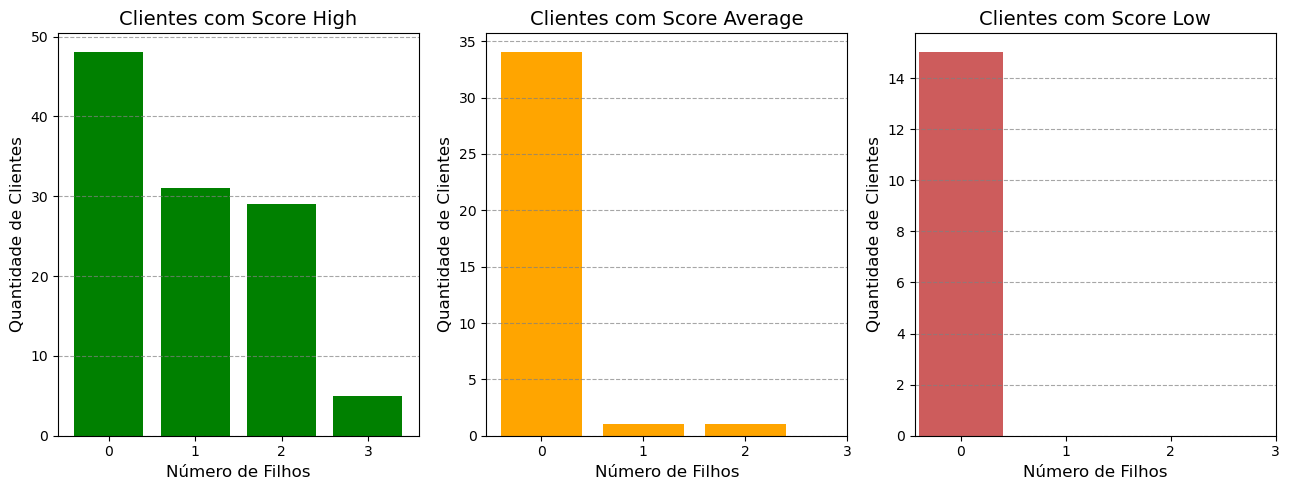

In [227]:
df_high = df[df['Credit Score'] == 'HIGH'] # Separa o DataFrame para Credit Score = High
df_average = df[df['Credit Score'] == 'AVERAGE'] # Separa o DataFrame para Credit Score = Average
df_low = df[df['Credit Score'] == 'LOW'] # Separa o DataFrame para Credit Score = Low

# Agrupa o número de crianças para clientes com score High
df_high_grouped = df_high['Number of Children'].value_counts().reset_index(name='Qty')

# Agrupa o número de crianças para clientes com score Average
df_average_grouped = df_average['Number of Children'].value_counts().reset_index(name='Qty')

# Agrupa o número de crianças para clientes com score Low
df_low_grouped = df_low['Number of Children'].value_counts().reset_index(name='Qty')

# Configura para termos 3 gráficos em uma linha
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Gráfico da linha 1 coluna 1 - Clientes com Score High
axes[0].bar(df_high_grouped['Number of Children'], df_high_grouped['Qty'], color='green')
axes[0].set_title('Clientes com Score High', fontsize=14)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xlabel('Número de Filhos', fontsize=12)
axes[0].set_xticks([0, 1, 2, 3])
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Gráfico da linha 1 coluna 2 - Clientes com Score Average
axes[1].bar(df_average_grouped['Number of Children'], df_average_grouped['Qty'], color='orange')
axes[1].set_title('Clientes com Score Average', fontsize=14)
axes[1].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[1].set_xlabel('Número de Filhos', fontsize=12)
axes[1].set_xticks([0, 1, 2, 3])
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Gráfico da linha 1 coluna 3 - Clientes com Score Low
axes[2].bar(df_low_grouped['Number of Children'], df_low_grouped['Qty'], color='indianred')
axes[2].set_title('Clientes com Score Low', fontsize=14)
axes[2].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[2].set_xlabel('Número de Filhos', fontsize=12)
axes[2].set_xticks([0, 1, 2, 3])
axes[2].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Remove espaços desnecessários
plt.tight_layout()

plt.show()

Como podemos analisar com os três gráficos separados para cada **Credit Score** *(HIGH, AVERAGE, LOW)*, em todos eles temos a maior parte com **0 filhos**. **Apenas 5 pessoas tem 3 filhos**, porém como temos grandes quantidades com 0 filhos em todos os perfis de Credit Score, estas que tem 3 filhos não influenciam na nossa variável preditora. **O outlier será mantido.**

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

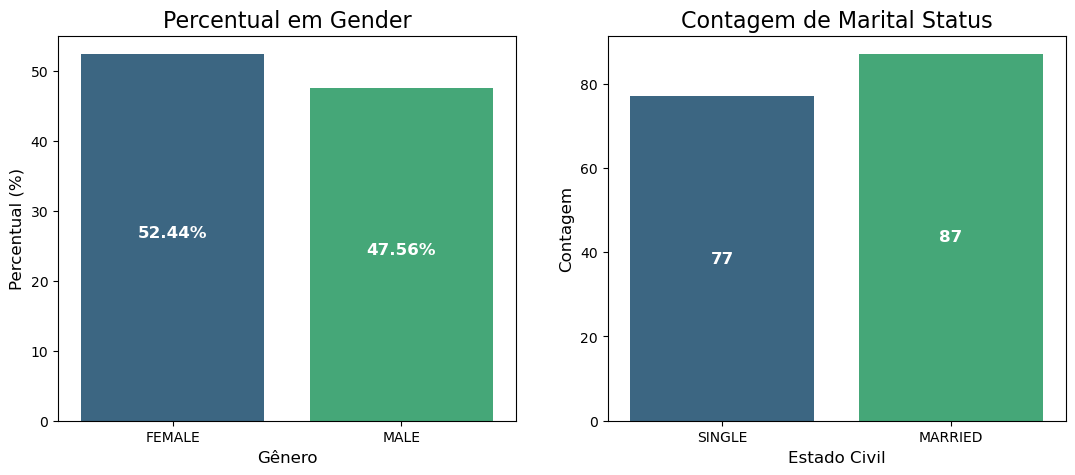

In [228]:
# Cria um dataframe com os valores percentuais
percentual_gender = df['Gender'].value_counts(normalize=True) * 100

# Configura para termos dois gráficos em uma linha
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Gráfico linha 1 coluna 1 - Percentual de Gender
sns.barplot(
    x=percentual_gender.index,
    y=percentual_gender.values,
    hue=percentual_gender.index, # Diferencia as cores pelos valores de X 
    palette='viridis',
    ax=axes[0],
)

# Configurações do gráfico linha 1 coluna 1
axes[0].set_title('Percentual em Gender', fontsize=16)
axes[0].set_ylabel('Percentual (%)', fontsize=12)
axes[0].set_xlabel('Gênero', fontsize=12)

# Colocamos os valores percentuais de cada barra no centro delas
for i, v in enumerate(percentual_gender.values):
    axes[0].text(i, v / 2, f'{v:.2f}%', ha='center', fontweight='bold', color='white', fontsize=12)

# Gráfico linha 1 coluna 2 - Contagem de Marital Status
sns.countplot(
    data=df,
    x='Marital Status',
    ax=axes[1],
    hue=df['Marital Status'],
    palette='viridis'
)

# Configurações do gráfico linha 1 coluna 2
axes[1].set_title('Contagem de Marital Status', fontsize=16)
axes[1].set_xlabel('Estado Civil', fontsize=12)
axes[1].set_ylabel('Contagem', fontsize=12)

# Configuramos para mostrar os valores dentro das barras
for p in axes[1].patches: # Itera sobre cada barra (patches) do countplot
    altura = p.get_height() # Pegamos a altura para calcular o centro de cada barra
    axes[1].text( # Configura o texto que será exibido em cada barra
        x=p.get_x() + p.get_width() / 2, # Pegamos a posição x e depois achamos o meio com width / 2
        y=altura / 2, # A metade da barra é a altura dela / 2
        s=f'{altura:.0f}', # String que será exibida
        ha='center', # Alinhamento horizontal central
        va='center', # Alinhamento vertical central
        color='white', # Cor branca no texto
        fontsize=12, # Tamanho do texto
        fontweight='bold' # Negrito no texto
    )

plt.show()

- Os percentuais de **Gender** para **Female** e **Male** são muito próximos.
- A quantidade de indivíduos **Single** e **Married** também são muito próximos

Podemos afirmar que os dados para **Gender** e **Marital Status** estão bem distribuídos.

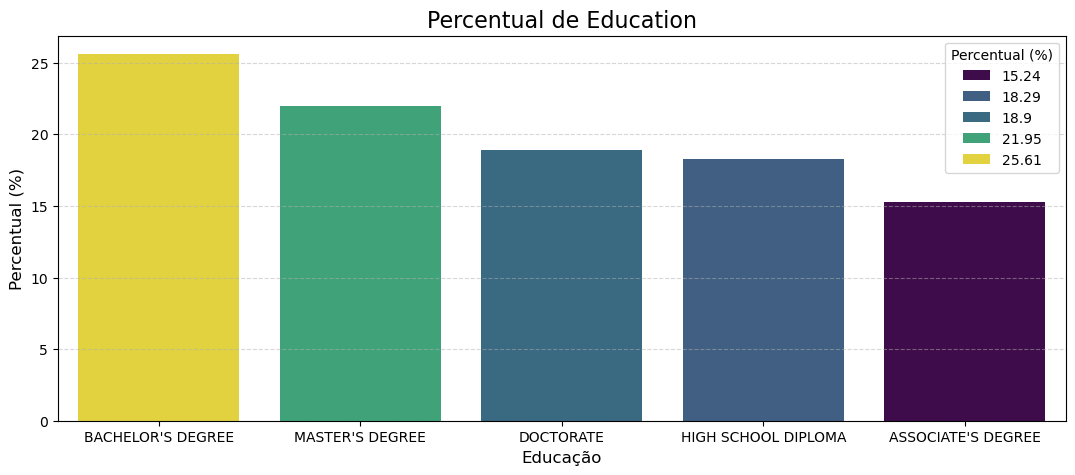

In [229]:
# Agrupa os dados categóricos de Education
percentual_education = df['Education'].value_counts(normalize=True) * 100

# Arredonda para 2 casas decimais para usarmos na legenda
percentual_education_rounded = percentual_education.round(2)

# Instancia a figura do gráfico
plt.figure(figsize=(13, 5))

# Configura o gráfico barplot para Education
sns.barplot(
    x=percentual_education.index,
    y=percentual_education.values,
    hue=percentual_education_rounded.values, # Utiliza valores arredondados para mostrar na legenda
    palette='viridis'
)

plt.title('Percentual de Education', fontsize=16) # Título do gráfico
plt.ylabel('Percentual (%)', fontsize=12) # Título do Eixo Y
plt.xlabel('Educação', fontsize=12) # Título do Eixo X
plt.legend(title='Percentual (%)') # Legenda do gráfico
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

No gráfico anterior separado por **Credit Score**, vemos que muitos dos clientes tem score *High e Average*. Com este gráfico, podemos perceber que estamos tratando com uma grande maioria de pessoas **bem escolarizadas**, como é o caso das 3 primeiras barras do gráfico **BACHELOR'S DEGREE, MASTER'S DEGREE e DOCTORATE** sendo as com maior quantidade.

C:\Users\flavianojr1\AppData\Local\Temp\ipykernel_15076\2845349280.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


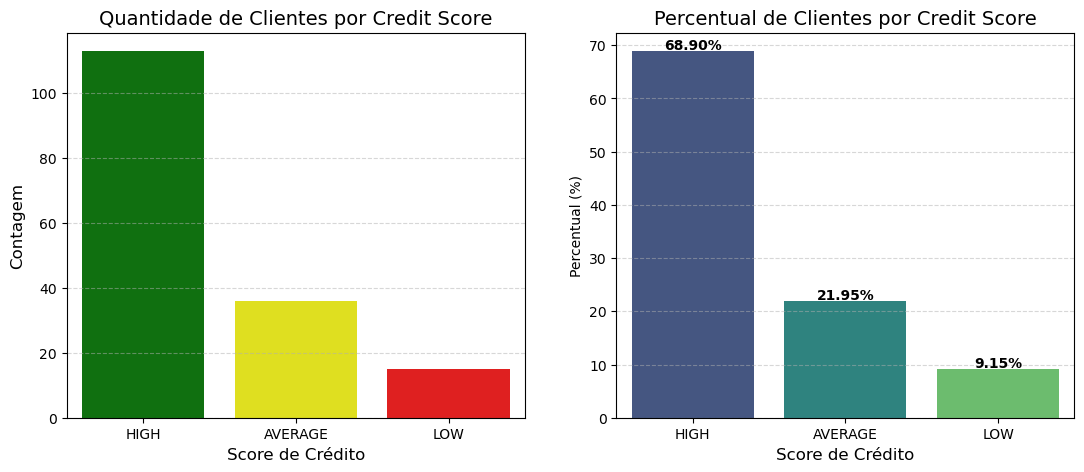

In [230]:
# credit_score_count = df['Credit Score'].value_counts().reset_index()

credit_score_percent = df['Credit Score'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

custom_palette = {
    'LOW': 'red',        # vermelho
    'AVERAGE': 'yellow',        # amarelo
    'HIGH': 'green',        # verde
}

sns.countplot(
    data=df,
    x='Credit Score',
    ax=axes[0],
    hue='Credit Score',
    palette=custom_palette,
)

axes[0].set_ylabel('Contagem', fontsize=12)
axes[0].set_xlabel('Score de Crédito', fontsize=12)
axes[0].set_title('Quantidade de Clientes por Credit Score', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5, axis='y')

sns.barplot(
    data=credit_score_percent,
    ax=axes[1],
    palette='viridis',
)

for p in axes[1].patches:
    altura = p.get_height()
    axes[1].text(
        x=p.get_x() + p.get_width() / 2,
        y=altura + 1,
        s=f'{altura:.2f}%',
        ha='center',
        va='center',
        fontweight='bold'
    )

axes[1].set_title('Percentual de Clientes por Credit Score', fontsize=14)
axes[1].set_xlabel('Score de Crédito', fontsize=12)
axes[1].set_ylabel('Percentual (%)')
axes[1].grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

Trazemos dois gráficos do mesmo dado **Credit Score**. Temos um percentual enorme para *scores* com *HIGH*, chegando a quase **70%** de todo o nosso dataframe.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

### Repetindo o código anterior já realizado

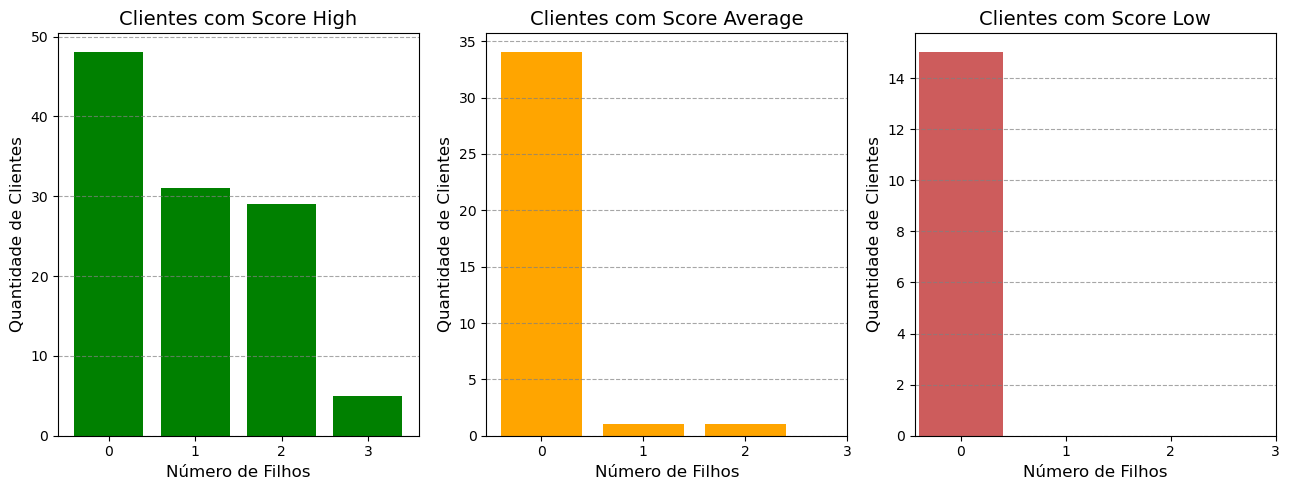

In [231]:
df_high = df[df['Credit Score'] == 'HIGH'] # Separa o DataFrame para Credit Score = High
df_average = df[df['Credit Score'] == 'AVERAGE'] # Separa o DataFrame para Credit Score = Average
df_low = df[df['Credit Score'] == 'LOW'] # Separa o DataFrame para Credit Score = Low

# Agrupa o número de crianças para clientes com score High
df_high_grouped = df_high['Number of Children'].value_counts().reset_index(name='Qty')

# Agrupa o número de crianças para clientes com score Average
df_average_grouped = df_average['Number of Children'].value_counts().reset_index(name='Qty')

# Agrupa o número de crianças para clientes com score Low
df_low_grouped = df_low['Number of Children'].value_counts().reset_index(name='Qty')

# Configura para termos 3 gráficos em uma linha
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Gráfico da linha 1 coluna 1 - Clientes com Score High
axes[0].bar(df_high_grouped['Number of Children'], df_high_grouped['Qty'], color='green')
axes[0].set_title('Clientes com Score High', fontsize=14)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xlabel('Número de Filhos', fontsize=12)
axes[0].set_xticks([0, 1, 2, 3])
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Gráfico da linha 1 coluna 2 - Clientes com Score Average
axes[1].bar(df_average_grouped['Number of Children'], df_average_grouped['Qty'], color='orange')
axes[1].set_title('Clientes com Score Average', fontsize=14)
axes[1].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[1].set_xlabel('Número de Filhos', fontsize=12)
axes[1].set_xticks([0, 1, 2, 3])
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Gráfico da linha 1 coluna 3 - Clientes com Score Low
axes[2].bar(df_low_grouped['Number of Children'], df_low_grouped['Qty'], color='indianred')
axes[2].set_title('Clientes com Score Low', fontsize=14)
axes[2].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[2].set_xlabel('Número de Filhos', fontsize=12)
axes[2].set_xticks([0, 1, 2, 3])
axes[2].grid(True, axis='y', linestyle='--', alpha=0.7, color='gray')

# Remove espaços desnecessários
plt.tight_layout()

plt.show()

Foi encontrado *outliers* para a quantidade de filhos igual a 3. No entanto, como são poucos e estão inseridos no **Credit Score** sendo **HIGH** e a maioria de todo o DataFrame é **HIGH** (quase 70%), **vamos manter estes dados**.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



### D) Existe relação entre a idade e o status civil?

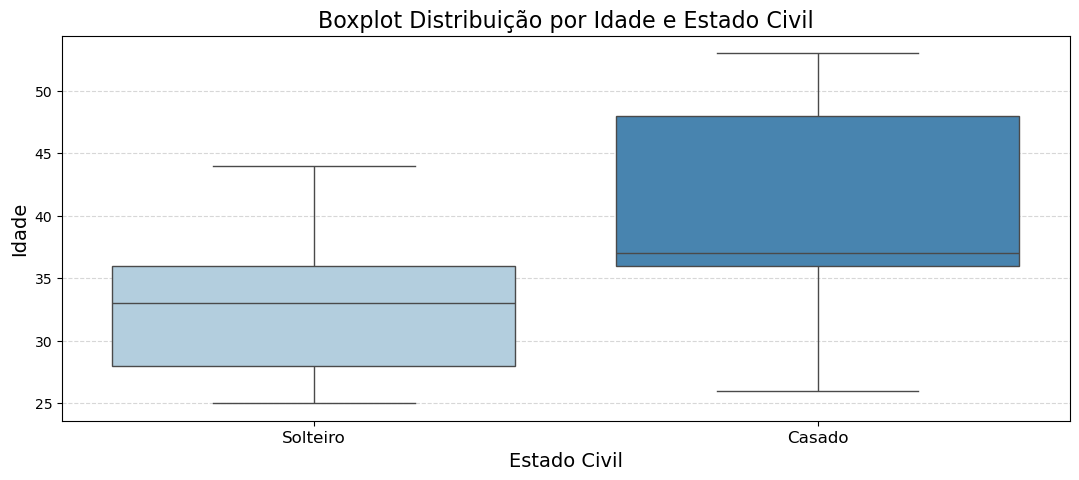

In [232]:
plt.figure(figsize=(13, 5))
sns.boxplot(
    data=df,
    x='Marital Status',
    y='Age',
    hue='Marital Status',
    palette='Blues',
)
plt.title('Boxplot Distribuição por Idade e Estado Civil', fontsize=16)
plt.ylabel('Idade', fontsize=14)
plt.xlabel('Estado Civil', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Solteiro', 'Casado'], fontsize=12)
plt.grid(True, linestyle='--', axis='y', alpha=0.5)

plt.show()

- A maior distribuição para **Solteiro** fica entre 27 e 36 anos
- A maior distribuição para **Casado** fica entre 36 e 47 anos
- Não encontramos ninguém solteiro **acima dos 45 anos de idade**
- A idade confirma uma forte relação, sendo **quanto mais velho, maior a probabilidade de ser casado**
- Não temos um *outlier* como por exemplo: um solteiro de 50 anos.

### D) Qual a relação entre o score de crédito e o nível de escolaridade?

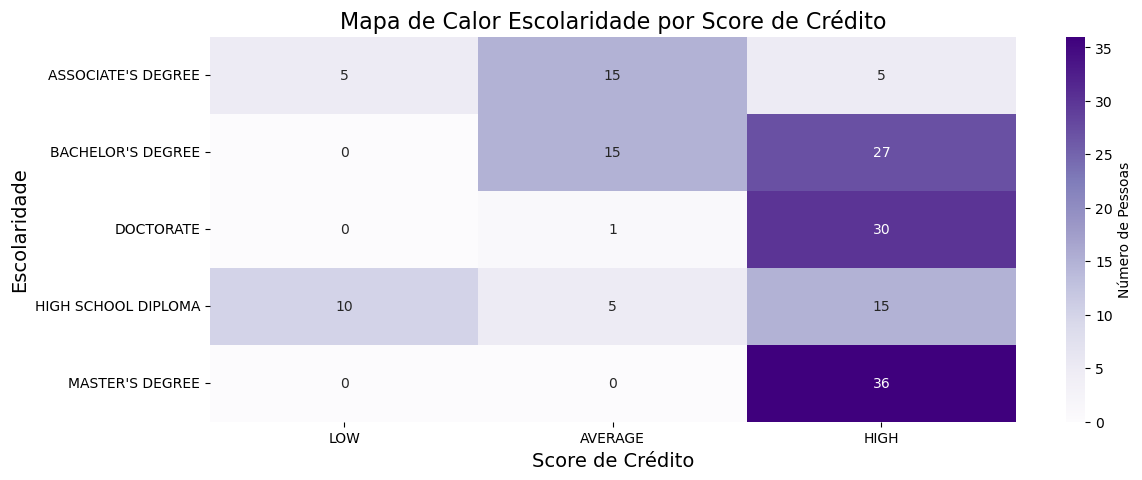

In [233]:
df_grouped = df.groupby(['Education', 'Credit Score']).size().unstack(fill_value=0)

df_grouped = df_grouped[['LOW', 'AVERAGE', 'HIGH']]

plt.figure(figsize=(13, 5))
sns.heatmap(
    data=df_grouped,
    cmap='Purples',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Número de Pessoas'}
)

plt.title('Mapa de Calor Escolaridade por Score de Crédito', fontsize=16)
plt.ylabel('Escolaridade', fontsize=14)
plt.xlabel('Score de Crédito', fontsize=14)
plt.show()

- Níveis mais alto de escolaridade (**MASTER'S, DOCTORATE e BACHELOR'S DEGREE**) apresentam um *score* de crédito mais alto
- A maioria para o score de crédito *AVERAGE* se equiparam entre **ASSOCIATE'S e BACHELOR'S DEGREE**
- Scores de Crédito baixos apresentam também níveis mais simples de escolaridade (**ASSOCIATE'S DEGREE e HIGH SCHOOL DIPLOMA**)
- Encontramos forte correlação para quanto maior o grau de escolaridade, maior o Score de Crédito

### D) O salário parece influenciar na idade?

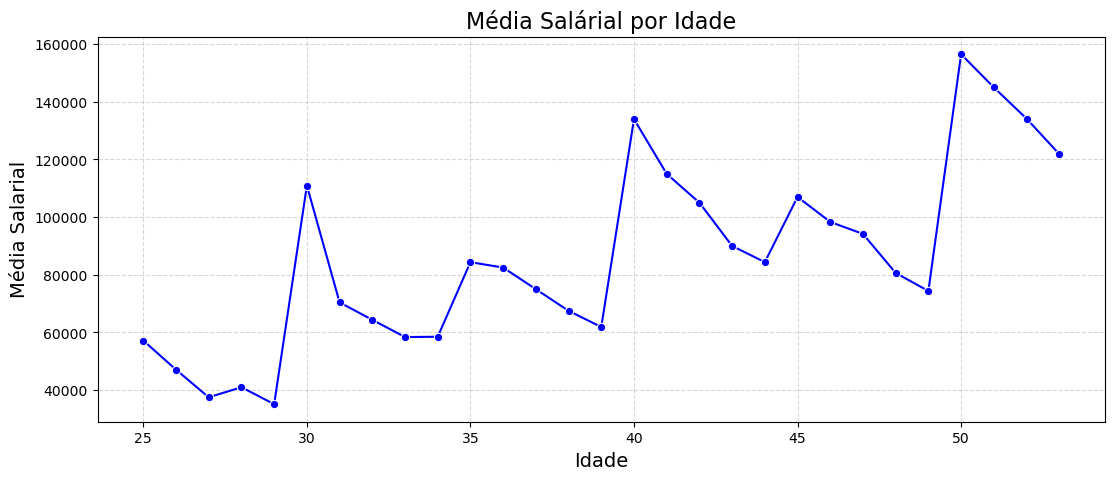

In [234]:
media_salario_idade = df.groupby('Age')['Income'].mean().reset_index()

plt.figure(figsize=(13, 5))
sns.lineplot(
    data=media_salario_idade,
    x='Age',
    y='Income',
    marker='o',
    color='blue'
)
plt.title('Média Salárial por Idade', fontsize=16)
plt.ylabel('Média Salarial', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

- Apesar de alguns picos nas idades 30, 40 e 50, o gráfico tem correlação positiva entre **Idade** e **Média Salarial**
- A média salarial tende a subir quanto maior a idade

### D) O salário parece influenciar no Score de Crédito?

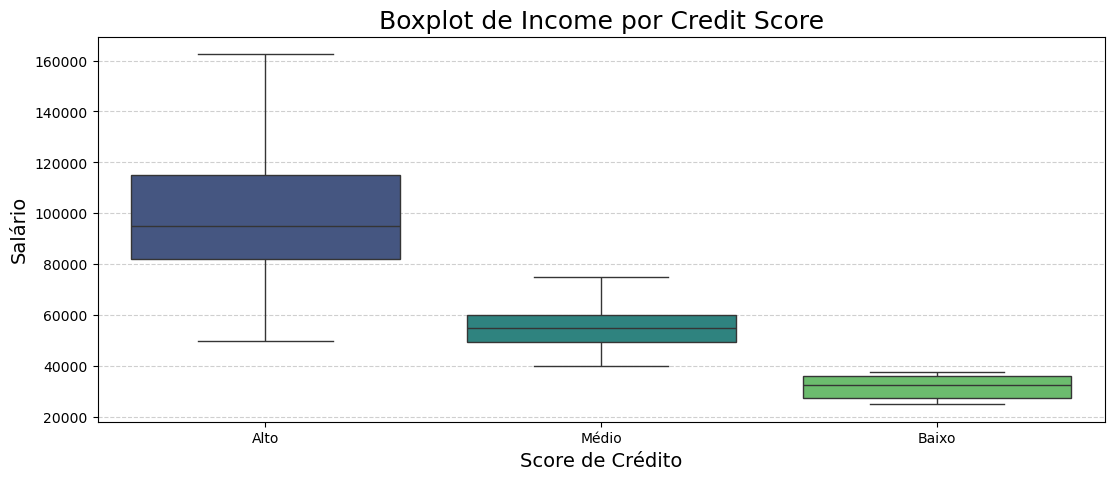

In [235]:
plt.figure(figsize=(13, 5)) # Configura a imagem do gráfico

# Configura um gráfico de Boxplot
sns.boxplot(data=df, x='Credit Score', y='Income', palette='viridis', hue='Credit Score')
plt.title('Boxplot de Income por Credit Score', fontsize=18) # Título do gráfico
plt.ylabel('Salário', fontsize=14) # Título do Eixo Y
plt.xlabel('Score de Crédito', fontsize=14) # Título do Eixo X
plt.xticks(ticks=[0, 1, 2], labels=['Alto', 'Médio', 'Baixo']) # Traduz os rótulos do eixo X
plt.grid(True, linestyle='--', axis='y', alpha=0.6) # Grid para melhor leitura
plt.show() # Mostra o gráfico

- Notamos que o *Credit Score* de grupo **Baixo** tem os menores salários
- No *Credit Score* **Médio**, temos muitas pessoas com salários parecidos com a faixa de *Credit Score* mínima do grupo**Alto**
- Podemos afirmar que um salário mais alto te realoca para um *Credit Score* **Alto**

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?

Vamos analisar três pontos interessantes, sendo eles:
- Distribuição de Filhos pela Faixa de Renda
- Distribuição de Escolaridade por Gênero
- Score de Crédito por número de filhos

### Quem tem mais filhos, tem renda maior?

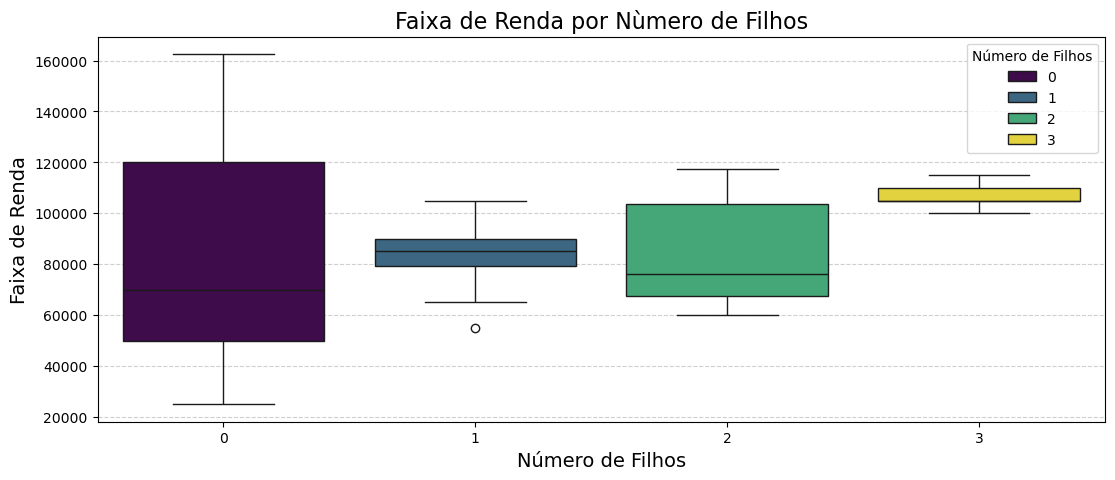

In [236]:
plt.figure(figsize=(13, 5)) # Configura o tamanho do gráfico

# Configura os eixos do Boxplot
sns.boxplot(data=df, x='Number of Children', y='Income', palette='viridis', hue='Number of Children')
plt.legend(title='Número de Filhos') # Traduz o título da legenda
plt.title('Faixa de Renda por Nùmero de Filhos', fontsize=16) # Insere o título
plt.ylabel('Faixa de Renda', fontsize=14) # Traduz o título do eixo Y
plt.xlabel('Número de Filhos', fontsize=14) # Traduz o título do eixo X
plt.grid(True, linestyle='--', axis='y', alpha=0.6) # Grid para melhor leitura
plt.show() # Mostra o gráfico

Podemos notar que:
- A faixa de renda se concentra entre 60.000 e 120.000 independente do número de filhos
- Apenas pessoas com **0 filhos** ultrapassam a faixa salarial de 120.000
- As menores faixas de renda também se apresentam com **0 filhos**
- Os dados com **2 filhos** são melhores distribuídos
- Pessoas com **3 filhos** se concentram numa mediana salarial maior que as outras com outras quantidades de filho
- Pessoas com 3 filhos não possuem renda menor que 100.000
- Há um *outlier* para 1 filho, onde essa pessoa possui a menor Faixa de Renda do seu grupo

### Existe diferença de escolaridade por gênero?

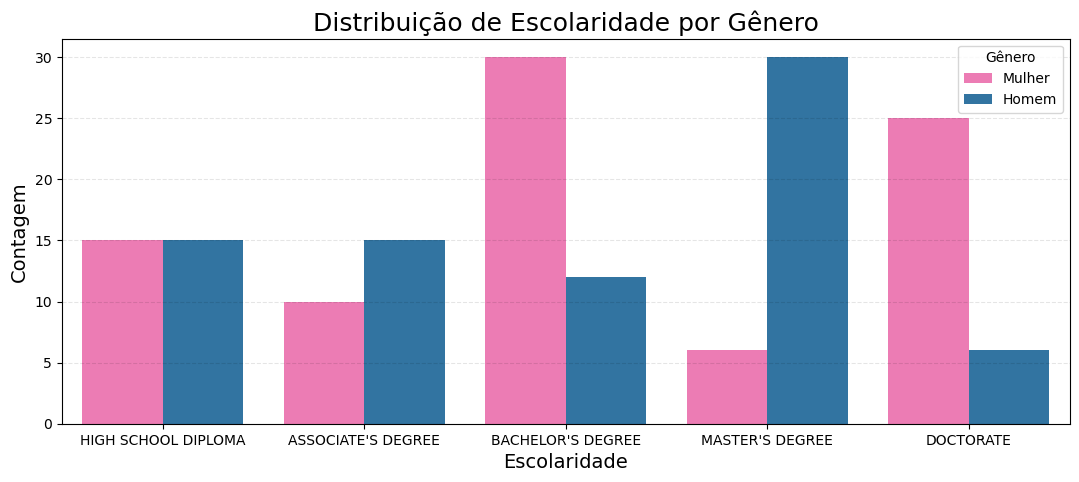

In [237]:
plt.figure(figsize=(13, 5)) # Configura o tamanho do gráfico

# Ordem da escolaridade mais básica a mais avançada
ordem_educacao = [
    "HIGH SCHOOL DIPLOMA",
    "ASSOCIATE'S DEGREE",
    "BACHELOR'S DEGREE",
    "MASTER'S DEGREE",
    "DOCTORATE"
]

# Configura o gráfico
sns.countplot(
    data=df,
    x='Education',
    hue='Gender', # Insere duas colunas separadas por gênero
    palette=['#ff69b4', '#1f77b4'], # Rosa claro e Azul Claro
    order=ordem_educacao # Ordena o eixo X do gráfico
)

plt.title('Distribuição de Escolaridade por Gênero', fontsize=18)
plt.ylabel('Contagem', fontsize=14)
plt.xlabel('Escolaridade', fontsize=14)
plt.grid(True, linestyle='--', axis='y', alpha=0.1, color='black')
plt.legend(title='Gênero', labels=['Mulher', 'Homem']) # Traduz a legenda
plt.show()

Com o gráfico ordenado da escolaridade mais básica para mais avançada, temos:
- Igualdade para *HIGH SCHOOL DIPLOMA*
- Homens buscam mais o nível de escolaridade superior mais básico (*ASSOCIATE'S DEGREE*)
- Os cursos superiores de mais duração temos predominância feminina
- O mestrado (*MASTER'S DEGREE*) pende para o sexo masculino

### O número de filhos influencia no Score de Crédito?

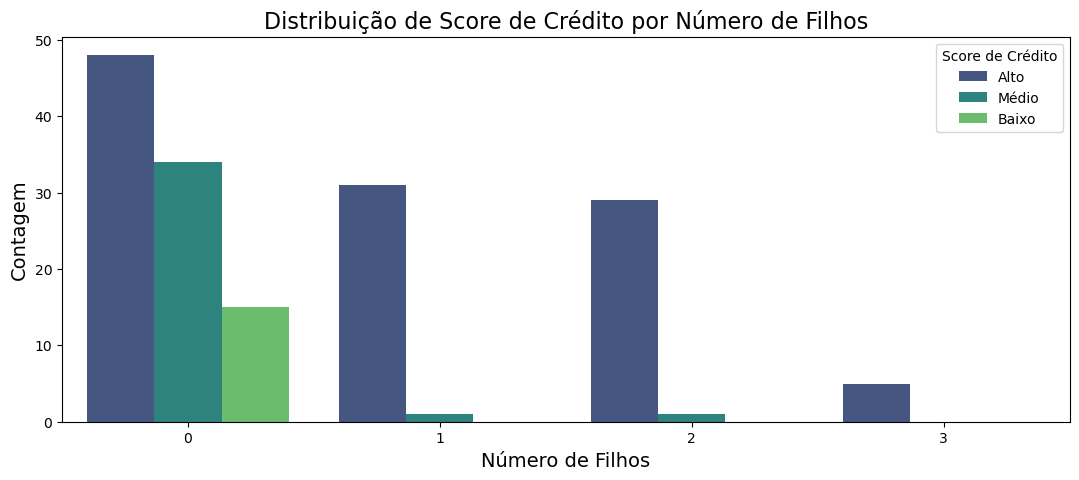

In [238]:
plt.figure(figsize=(13, 5)) # Configura o tamanho do gráfico

# Configuração do nosso countplot
sns.countplot(
    data=df,
    x='Number of Children',
    hue='Credit Score', # Acrescenta colunas de crédito por número de filhos
    palette='viridis'
)
plt.title('Distribuição de Score de Crédito por Número de Filhos', fontsize=16)
plt.ylabel('Contagem', fontsize=14)
plt.xlabel('Número de Filhos', fontsize=14)
plt.legend(title='Score de Crédito', labels=['Alto', 'Médio', 'Baixo']) # Traduz a legenda
plt.show()

- Grande parte dos clientes **não tem filhos**
- Grande parte dos clientes tem score de crédito **ALTO**, **independente da quantidade de filhos**
- Não podemos afirmar que existe correlação de número de filhos com *Credit Score*

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [239]:
df.select_dtypes('number').corr() # Matriz de correlação

,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


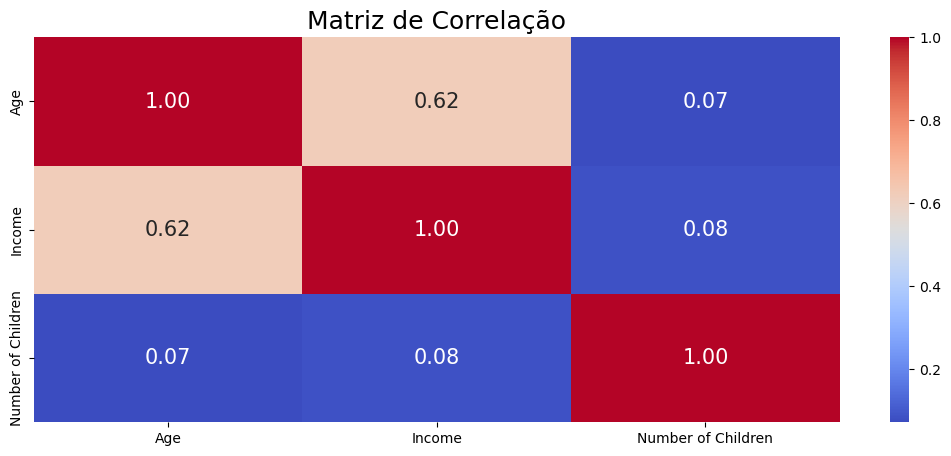

In [240]:
matriz_correlacao = df.select_dtypes('number').corr() # Armazena a correlação em uma variável

# Configura tamanho do gráfico
plt.figure(figsize=(13, 5))

# Aplica o gráfico de mapa de calor
sns.heatmap(
    data=matriz_correlacao,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'size': 15}
)
plt.title('Matriz de Correlação', fontsize=18)
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Sim, encontramos as variáveis **Income** e **Age** estarem mais correlacionadas que todas as outras.

**Faz sentido serem correlacionadas** pois com a maior idade (*Age*), mais experiência de trabalho a pessoa está propensa a ter, o que causa ser mais eficaz e produtivo, consequentemente apresentando um salário (*Income*) maior.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

### Tratando o atributo 'Gender' com LabelEncoder

In [241]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância de Label Encoder
label_encoder = LabelEncoder()

# Aplicando Label Encoder para a coluna 'Gender'
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Temos 0 para FEMALE e 1 para MALE

# Vamos excluir a coluna Gênero não mais utilizada
df.drop(columns=['Gender'], inplace=True)

df.head(10)

,Age,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded
0,25,50000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,HIGH,0
1,30,100000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH,1
2,35,75000.0,DOCTORATE,MARRIED,1,OWNED,HIGH,0
3,40,125000.0,HIGH SCHOOL DIPLOMA,SINGLE,0,OWNED,HIGH,1
4,45,100000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH,0
5,50,150000.0,MASTER'S DEGREE,MARRIED,0,OWNED,HIGH,1
6,26,40000.0,ASSOCIATE'S DEGREE,SINGLE,0,RENTED,AVERAGE,0
7,31,60000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,AVERAGE,1
8,36,80000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH,0
9,36,105000.0,DOCTORATE,SINGLE,0,OWNED,HIGH,1


### Tratando o atributo 'Education' com OneHot (para não atribuir peso)

In [242]:
df = pd.get_dummies(df, columns=['Education'], prefix='ED_', drop_first=True)

df.head() # Caso todos falsos, 'Education' = "Associate's Degree"

,Age,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,ED__BACHELOR'S DEGREE,ED__DOCTORATE,ED__HIGH SCHOOL DIPLOMA,ED__MASTER'S DEGREE
0,25,50000.0,SINGLE,0,RENTED,HIGH,0,True,False,False,False
1,30,100000.0,MARRIED,2,OWNED,HIGH,1,False,False,False,True
2,35,75000.0,MARRIED,1,OWNED,HIGH,0,False,True,False,False
3,40,125000.0,SINGLE,0,OWNED,HIGH,1,False,False,True,False
4,45,100000.0,MARRIED,3,OWNED,HIGH,0,True,False,False,False


### Tratando Marital Status com LabelEncoder

In [243]:
df['Marital Status Code'] = label_encoder.fit_transform(df['Marital Status'])

df.head() # SINGLE = 1 / MARRIED = 0

df.drop(columns=['Marital Status'], inplace=True)

### Tratando 'Home Ownership' com LabelEncoder

In [244]:
df['Home Ownership Code'] = label_encoder.fit_transform(df['Home Ownership'])

df.head() # RENTED = 0 / OWNED = 1

df.drop(columns=['Home Ownership'], inplace=True)

### Tratando o atributo 'Credit Score' com LabelEncoder

In [245]:
df['Credit Score Code'] = label_encoder.fit_transform(df['Credit Score'])

df.head(20) # HIGH = 1 / AVERAGE = 0 / LOW = 2

df.drop(columns=['Credit Score'], inplace=True)

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

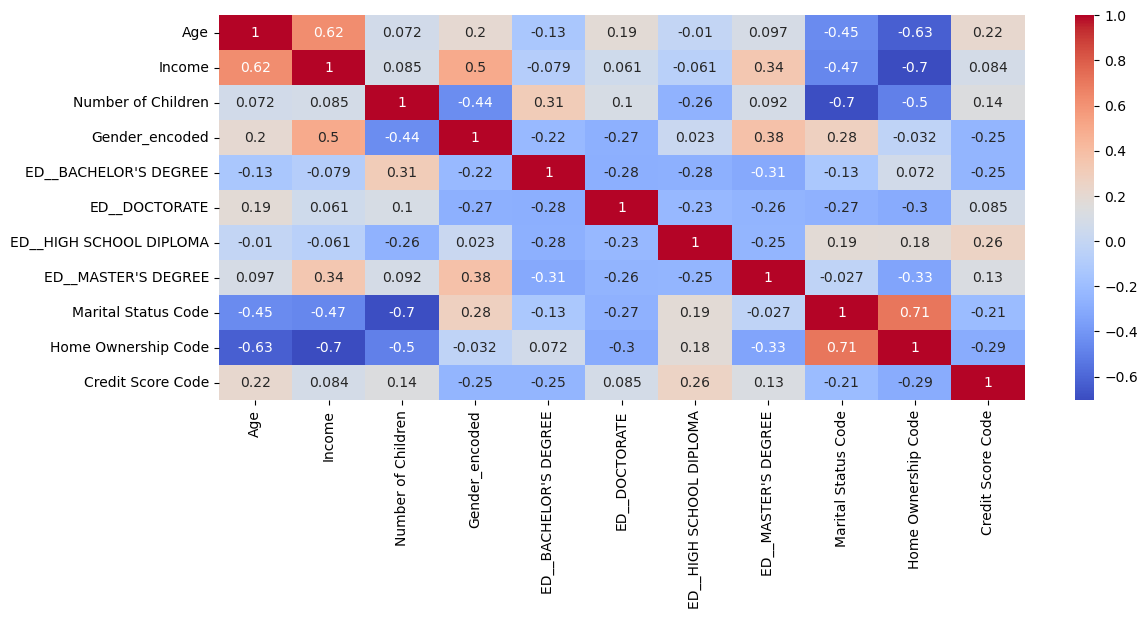

In [246]:
matriz_correlacao = df.corr() # Cria a matriz de correlação

# Configura o tamanho do gráfico
plt.figure(figsize=(13, 5))

# Configura o gráfico da matriz de correlação
sns.heatmap(
    data=matriz_correlacao,
    annot=True,
    cmap='coolwarm'
)

plt.show()

Variáveis com correlações:
- **Income** e **Age**
- **Marital Status** com **Number of Children**
- **Home Ownership** com **Income**, **Number of Children** e **Marital Status**

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [247]:
# Separando os dados em features X e o alvo y
X = df.drop('Credit Score Code', axis=1) # Credit Score é a variável a ser predita
y = df['Credit Score Code']

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
# Separar os dados em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# test_size = 25% do nosso dataframe separados para teste
# random_state = 42 permite a replicabilidade

In [250]:
print('Tamanho de X_train: ', X_train.shape)

Tamanho de X_train:  (123, 10)


In [251]:
print('Tamanho de X_test: ', X_test.shape)

Tamanho de X_test:  (41, 10)


In [252]:
print('Tamanho de y_train: ', y_train.shape)

Tamanho de y_train:  (123,)


In [253]:
print('Tamanho de y_test: ', y_test.shape)

Tamanho de y_test:  (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

([<matplotlib.axis.XTick at 0x11b0b976630>,
 [Text(0, 0, 'Alto'), Text(1, 0, 'Médio'), Text(2, 0, 'Baixo')])

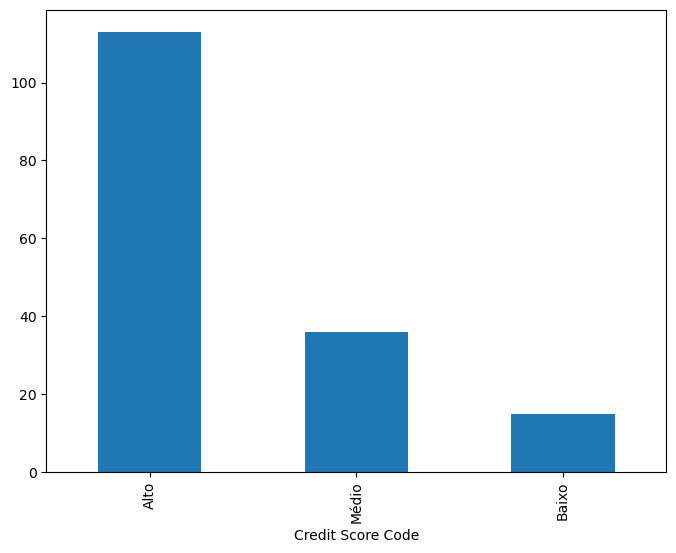

In [254]:
credit_score_counts = df['Credit Score Code'].value_counts()
plt.figure(figsize=(8, 6))
credit_score_counts.plot(kind='bar')
plt.xticks(ticks=[0, 1, 2], labels=['Alto', 'Médio', 'Baixo'])

In [255]:
df['Credit Score Code'].value_counts(normalize=True) * 100

Credit Score Code
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64

**Credit Score** não está balanceado. Como a grande maioria dos nossos clientes tem *Credit Score* alto, o modelo pode simplesmente chutar alto e acertar quase que 70% do nosso DataFrame.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [256]:
from imblearn.over_sampling import SMOTE

# Criar uma instância SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição após rebalanceamento
train_balanced = y_train_balanced.value_counts()

print('Balanceamento em y_train:')
print(train_balanced)

Balanceamento em y_train:
Credit Score Code
0    84
2    84
1    84
Name: count, dtype: int64
